# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from __future__ import print_function, division

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np

import nsfg
import first

Given a list of values, there are several ways to count the frequency of each value.

In [3]:
t = [1, 2, 2, 3, 5]

You can use a Python dictionary:

In [4]:
hist = {}
for x in t:
    hist[x] = hist.get(x, 0) + 1
    
hist

{1: 1, 2: 2, 3: 1, 5: 1}

You can use a `Counter` (which is a dictionary with additional methods):

In [7]:
from collections import Counter
t
counter = Counter(t)
counter

[1, 2, 2, 3, 5]

Counter({1: 1, 2: 2, 3: 1, 5: 1})

Or you can use the `Hist` object provided by `thinkstats2`:

In [8]:
import thinkstats2
hist = thinkstats2.Hist([1, 2, 2, 3, 5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

`Hist` provides `Freq`, which looks up the frequency of a value.

In [10]:
hist.Freq(2)
hist.Freq(5)

2

1

You can also use the bracket operator, which does the same thing.

In [11]:
hist[2]

2

If the value does not appear, it has frequency 0.

In [12]:
hist[4]

0

The `Values` method returns the values:

In [13]:
hist.Values()

dict_keys([1, 2, 3, 5])

So you can iterate the values and their frequencies like this:

In [14]:
for val in sorted(hist.Values()):
    print(val, hist[val])

1 1
2 2
3 1
5 1


Or you can use the `Items` method:

In [15]:
for val, freq in hist.Items():
     print(val, freq)

1 1
2 2
3 1
5 1


`thinkplot` is a wrapper for `matplotlib` that provides functions that work with the objects in `thinkstats2`.

For example `Hist` plots the values and their frequencies as a bar graph.

`Config` takes parameters that label the x and y axes, among other things.

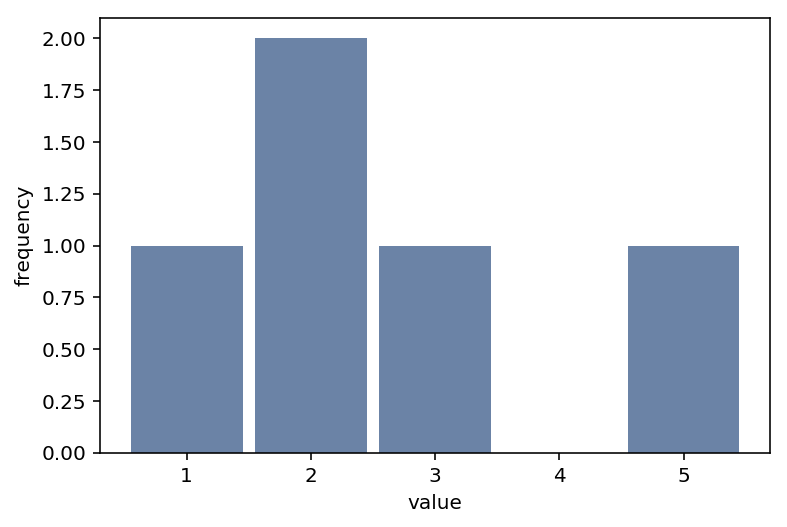

In [16]:
import thinkplot
thinkplot.Hist(hist)
thinkplot.Config(xlabel='value', ylabel='frequency')

As an example, I'll replicate some of the figures from the book.

First, I'll load the data from the pregnancy file and select the records for live births.

In [27]:
datafile_base= "ThinkStats2/code/2002FemPreg"
preg = nsfg.ReadFemPreg(dct_file =datafile_base + ".dct", dat_file =datafile_base + ".dat.gz")
live = preg[preg.outcome == 1]

Here's the histogram of birth weights in pounds.  Notice that `Hist` works with anything iterable, including a Pandas Series.  The `label` attribute appears in the legend when you plot the `Hist`. 

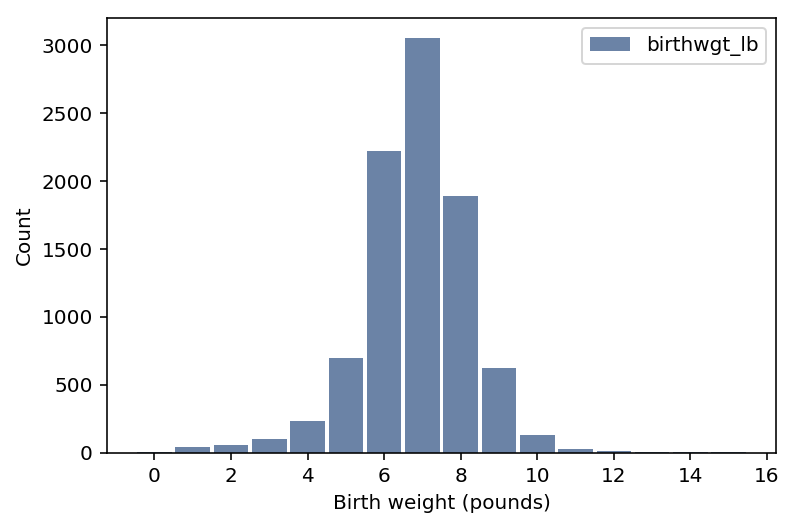

In [19]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

Before plotting the ages, I'll apply `floor` to round down:

In [32]:
ages = np.floor(live.agepreg)

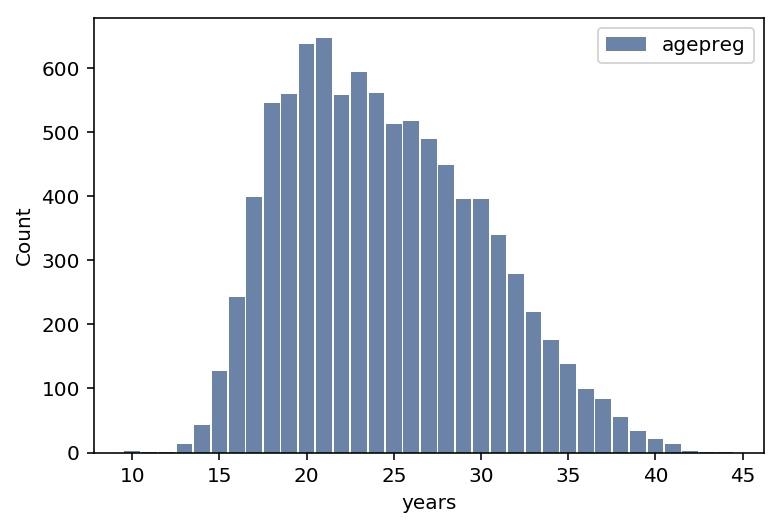

In [33]:
hist = thinkstats2.Hist(ages, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')

As an exercise, plot the histogram of pregnancy lengths (column `prglngth`).

0       15
1        9
2       78
3      151
4      412
5      181
6      543
7      175
8      409
9      594
10     137
11     202
12     170
13     446
14      29
15      39
16      44
17     253
18      17
19      34
20      18
21      37
22     147
23      12
24      31
25      15
26     117
27       8
28      38
29      23
30     198
31      29
32     122
33      50
34      60
35     357
36     329
37     457
38     609
39    4744
40    1120
41     591
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: prglngth, dtype: int64

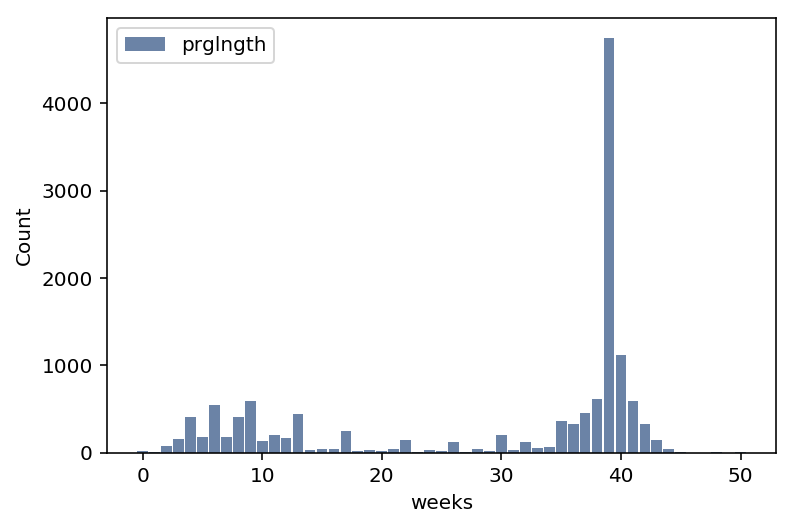

In [47]:
hist = thinkstats2.Hist(preg.prglngth, label='prglngth')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='weeks', ylabel='Count')

preg.prglngth.value_counts().sort_index()

`Hist` provides smallest, which select the lowest values and their frequencies.

In [48]:
for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

0 15
1 9
2 78
3 151
4 412
5 181
6 543
7 175
8 409
9 594


Use `Largest` to display the longest pregnancy lengths.

In [49]:
for weeks, freq in hist.Largest(10):
    print(weeks, freq)

50 2
48 7
47 1
46 1
45 10
44 46
43 148
42 328
41 591
40 1120


From live births, we can selection first babies and others using `birthord`, then compute histograms of pregnancy length for the two groups.

In [75]:
live.columns
live.columns[230:241]

import re
r = re.compile(".*birth.*")
str(filter(r.match, live.columns))

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'laborfor_i', 'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt',
       'finalwgt', 'secu_p', 'sest', 'cmintvw', 'totalwgt_lb'],
      dtype='object', length=244)

Index(['parity_i', 'insuranc_i', 'pubassis_i', 'poverty_i', 'laborfor_i',
       'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt', 'finalwgt',
       'secu_p'],
      dtype='object')

'<filter object at 0x112c057b8>'

In [76]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
other_hist = thinkstats2.Hist(others.prglngth, label='other')

We can use `width` and `align` to plot two histograms side-by-side.

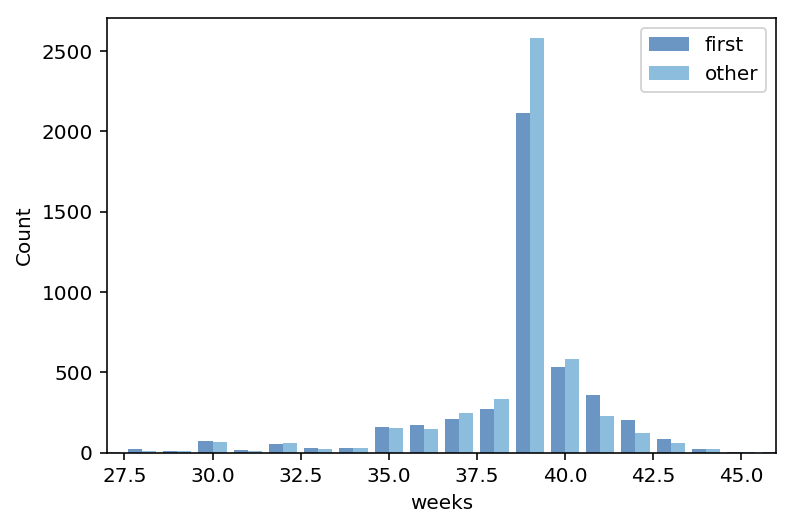

In [81]:
width = 0.4
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46])

`Series` provides methods to compute summary statistics:

In [82]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

Here are the mean and standard deviation:

In [83]:
mean, std

(38.56055968517709, 2.702343810070587)

As an exercise, confirm that `std` is the square root of `var`:

In [86]:
std == var**(1/2)

True

Here's are the mean pregnancy lengths for first babies and others:

In [87]:
firsts.prglngth.mean(), others.prglngth.mean()

(38.600951733514613, 38.522914466737063)

And here's the difference (in weeks):

In [88]:
firsts.prglngth.mean() - others.prglngth.mean()

0.078037266777549519

This functon computes the Cohen effect size, which is the difference in means expressed in number of standard deviations:

In [89]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
             
             If positive, then group1 < group2
             If negative, then group1 > group2.
             Cohen provides the following general rule of thumb:
                 0.2 is small, 0.5 is medium, 0.8 is big effect size
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

Compute the Cohen effect size for the difference in pregnancy length for first babies and others.

In [94]:
CohenEffectSize(firsts.prglngth, others.prglngth)
CohenEffectSize(others.prglngth, firsts.prglngth)
CohenEffectSize(firsts.prglngth, others.prglngth) == CohenEffectSize(others.prglngth, firsts.prglngth)

0.028879044654449834

-0.028879044654449834

False

## Exercises

Do first babies arrive late?

In [ ]:
# Solution goes here

Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. 

Compute Cohen’s effect size to quantify the difference between the groups.  How does it compare to the difference in pregnancy length?

In [103]:
# Solution goes here

CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)

-0.088672927072601743

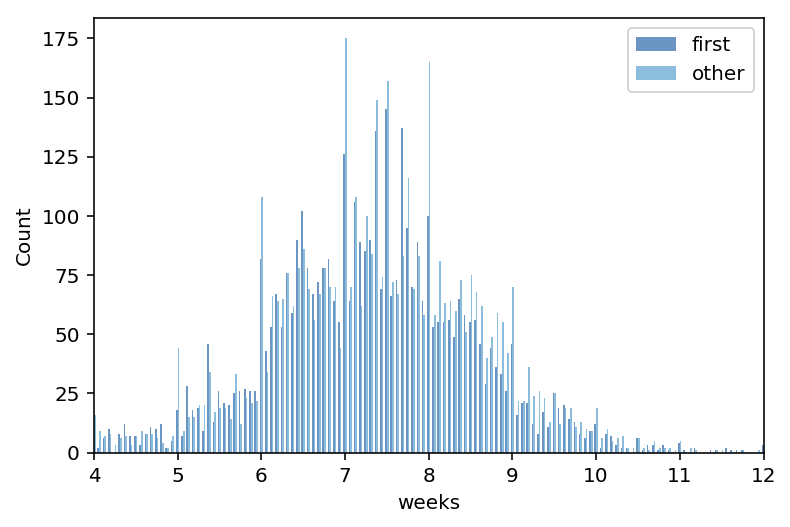

In [102]:
# Solution goes here

first_hist = thinkstats2.Hist(firsts.totalwgt_lb, label='first')
other_hist = thinkstats2.Hist(others.totalwgt_lb, label='other')

width = 0.02
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[4,12])

For the next few exercises, we'll load the respondent file:

In [105]:
# Solution goes here

datafile_base= "ThinkStats2/code/2002FemResp"
resp = nsfg.ReadFemResp(dct_file =datafile_base + ".dct", dat_file =datafile_base + ".dat.gz")

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=FEM&section=R&subSec=7876&srtLabel=607543).

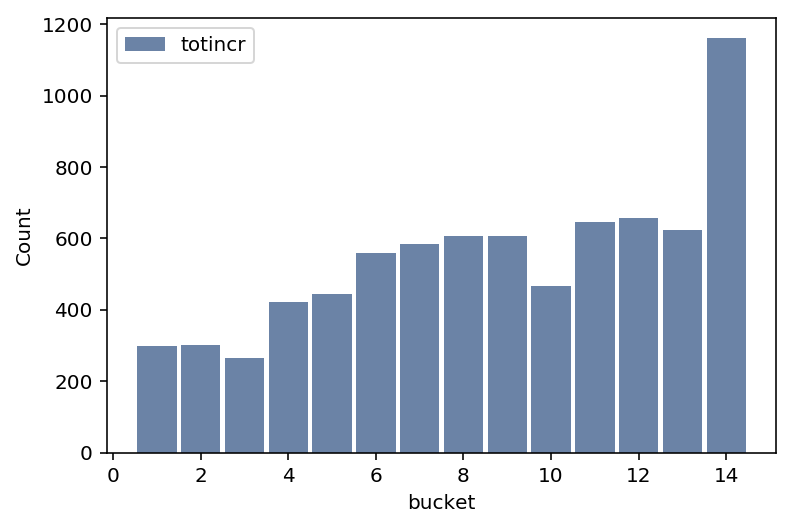

In [108]:
# Solution goes here

hist = thinkstats2.Hist(resp.totincr, label='totincr')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='bucket', ylabel='Count')

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

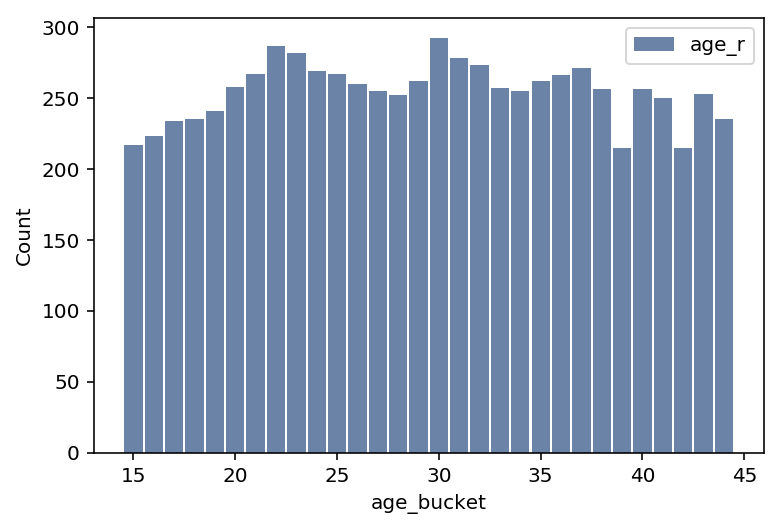

In [138]:
# Solution goes here

hist = thinkstats2.Hist(resp.ager, label='age_r')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='age_bucket', ylabel='Count')

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

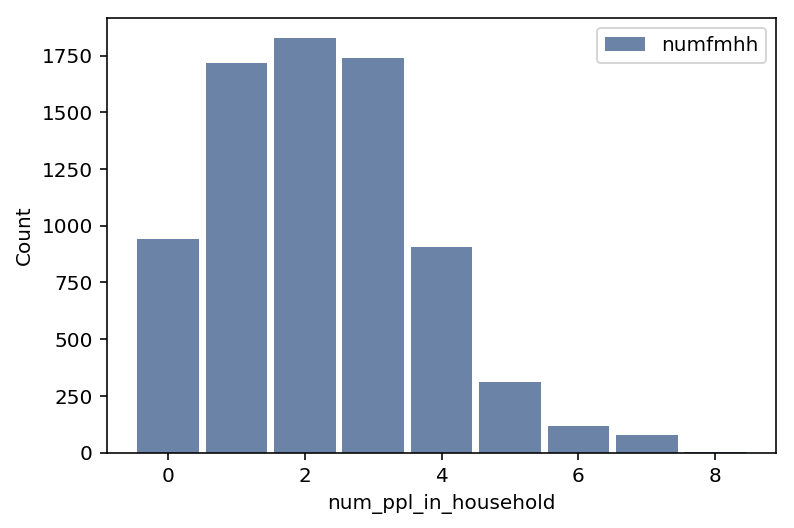

In [110]:
# Solution goes here

hist = thinkstats2.Hist(resp.numfmhh, label='numfmhh')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='num_ppl_in_household', ylabel='Count')

Make a histogram of <tt>parity</tt>, the number of children borne by the respondent.  How would you describe this distribution?

Hist({0: 3230, 2: 1603, 1: 1519, 3: 828, 4: 309, 5: 95, 6: 29, 7: 15, 8: 8, 10: 3, 9: 2, 22: 1, 16: 1})

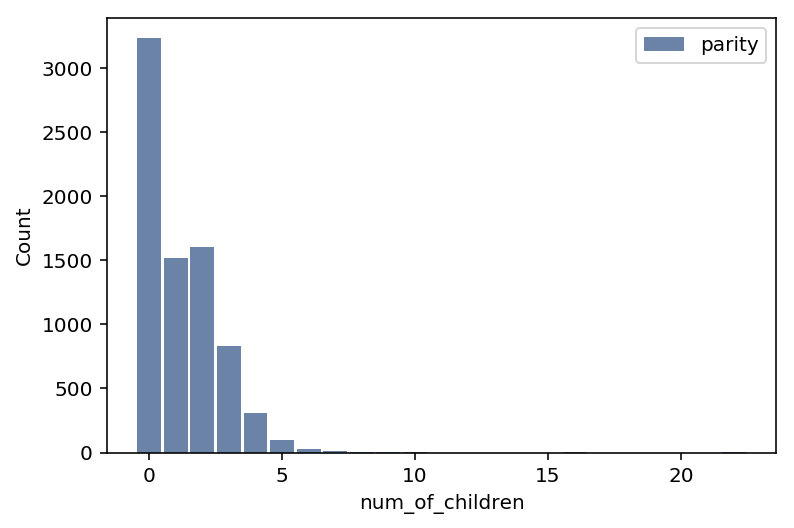

In [140]:
# Solution goes here

hist = thinkstats2.Hist(resp.parity)
thinkplot.Hist(hist, label='parity')
thinkplot.Config(xlabel='num_of_children', ylabel='Count')

hist

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [142]:
# Solution goes here

hist.Largest(10)

[(22, 1),
 (16, 1),
 (10, 3),
 (9, 2),
 (8, 8),
 (7, 15),
 (6, 29),
 (5, 95),
 (4, 309),
 (3, 828)]

Let's investigate whether people with higher income have higher parity.  Keep in mind that in this study, we are observing different people at different times during their lives, so this data is not the best choice for answering this question.  But for now let's take it at face value.

Use <tt>totincr</tt> to select the respondents with the highest income (level 14).  Plot the histogram of <tt>parity</tt> for just the high income respondents.

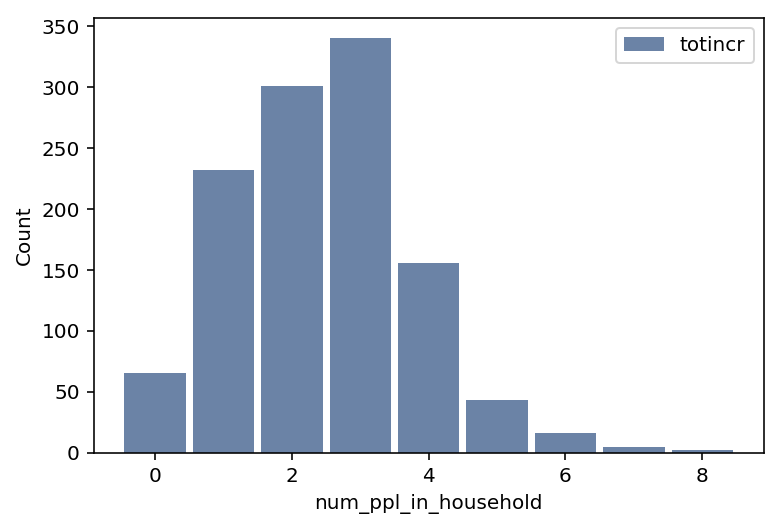

In [131]:
# Solution goes here

high_income = resp[resp.totincr == 14]
hist = thinkstats2.Hist(high_income.numfmhh, label='totincr')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='num_ppl_in_household', ylabel='Count')

Find the largest parities for high income respondents.

In [132]:
# Solution goes here

high_income = resp[resp.totincr == 14]
hist = thinkstats2.Hist(high_income.parity)
hist.Largest(2)

[(8, 1), (7, 1)]

Compare the mean <tt>parity</tt> for high income respondents and others.

In [136]:
# Solution goes here

high_income = resp[resp.totincr == 14]
low_income = resp[resp.totincr != 14]

high_income.parity.mean()
low_income.parity.mean()



1.0758620689655172

1.2495758136665125

Compute the Cohen effect size for this difference.  How does it compare with the difference in pregnancy length for first babies and others?

In [137]:
# Solution goes here

CohenEffectSize(high_income.parity, low_income.parity)

## High income tend to have more children?

-0.12511855314660367